<a href="https://colab.research.google.com/github/Lisa-creates/Sales_funnel/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_1_%D0%90%D0%94%D0%B2%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Плдключение к базе данных

In [ ]:
import psycopg2
import pandas as pd
from datetime import datetime
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


conn = psycopg2.connect(
 host="158.160.52.106",
 port=5432,
 database="postgres",
 user="student",
 password="JvLda93aA",
)


Выгрузка данных из базы

In [ ]:
df_cl = pd.read_sql("SELECT client_rk, visit_dttm FROM msu_analytics.client", conn) # зашли на сайт

df_ac = pd.read_sql("SELECT a.client_rk, c.visit_dttm from msu_analytics.client c INNER JOIN msu_analytics.account a  ON c.client_rk  = a.client_rk ", conn) # зарегистрировались

df_regist_game = pd.read_sql("SELECT distinct(a2.account_rk), c.visit_dttm from msu_analytics.client c INNER JOIN msu_analytics.account a2  ON c.client_rk  = a2.client_rk inner join msu_analytics.application a  on a.account_rk = a2.account_rk order by c.visit_dttm", conn) # зарегистрировались на игру

df_game = pd.read_sql("SELECT distinct(a2.account_rk), c.visit_dttm from msu_analytics.client c INNER JOIN msu_analytics.account a2  ON c.client_rk  = a2.client_rk inner join msu_analytics.application a  on a.account_rk = a2.account_rk inner join msu_analytics.game g  on a.game_rk = g.game_rk  where g.game_flg = 1 order by a2.account_rk", conn) # играли


/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, pl

Сборка датасета по неделям

In [ ]:
df_cl_w = df_cl.groupby(pd.Grouper(key="visit_dttm", freq="W")).count()

df_ac_w = df_ac.groupby(pd.Grouper(key="visit_dttm", freq="W")).count()

df_regist_game_w = df_regist_game.groupby(pd.Grouper(key="visit_dttm", freq="W")).count()

df_game = df_game.drop_duplicates(subset=['account_rk'])
df_game_w = df_game.groupby(pd.Grouper(key="visit_dttm", freq="W")).count()

df = pd.concat([df_cl_w, df_ac_w, df_regist_game_w, df_game_w], axis=1).reindex(df_cl_w.index) # данные по неделям
df.columns =['Посетили', 'Зарегистриовались', 'Записались', 'Пришли']
df['Дата'] = df.index

График по неделям

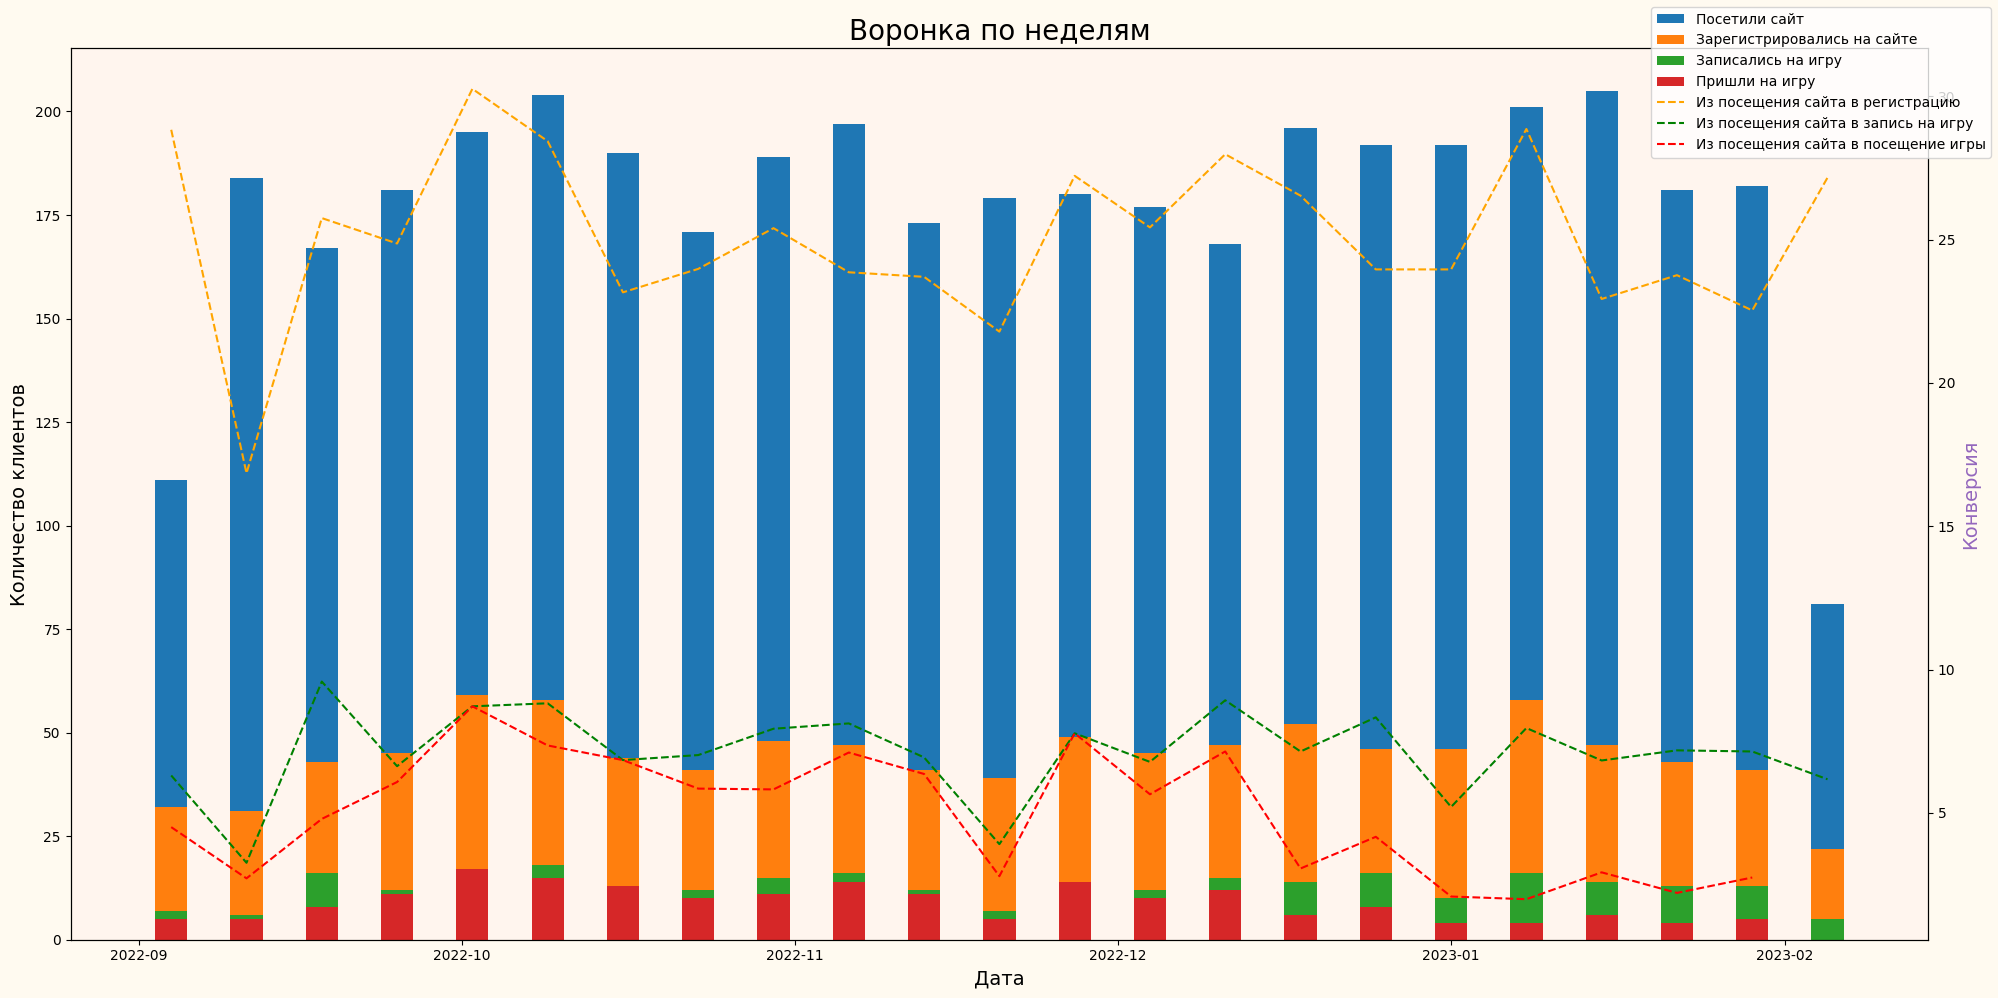

In [ ]:
fig, ax = plt.subplots()

wd=3
ax.bar(df['Дата'], df['Посетили'], width=wd,label='Посетили сайт')
ax.bar(df['Дата'], df['Зарегистриовались'],width=wd, label='Зарегистрировались на сайте')
ax.bar(df['Дата'], df['Записались'],width=wd, label='Записались на игру')
ax.bar(df['Дата'], df['Пришли'],width=wd, label = "Пришли на игру")

ax.set_ylabel('Количество клиентов', fontsize=14)
ax.set_xlabel('Дата', fontsize=14)
ax.set_facecolor('seashell')

ax2 = ax.twinx()
ax2.set_ylabel('Конверсия', color='tab:purple', fontsize=14)

ax2.plot(df['Дата'], df['Зарегистриовались'] * 100 / df['Посетили'],color="orange", label = "Из посещения сайта в регистрацию", linestyle='dashed')
ax2.plot(df['Дата'], df['Записались'] * 100 / df['Посетили'], color="green", label = "Из посещения сайта в запись на игру", linestyle='dashed')
ax2.plot(df['Дата'],  df['Пришли'] * 100 / df['Посетили'],color="red", label = "Из посещения сайта в посещение игры", linestyle='dashed')

fig.set_figwidth(20)
fig.set_figheight(10)
fig.set_facecolor('floralwhite')
plt.title('Воронка по неделям', fontsize=20)

fig.tight_layout()
fig.legend()
plt.show()

Сборка датасета по месяцам

In [ ]:
df_cl_m = df_cl.groupby(pd.Grouper(key="visit_dttm", freq="M")).count()
df_ac_m = df_ac.groupby(pd.Grouper(key="visit_dttm", freq="M")).count()
df_regist_game_m = df_regist_game.groupby(pd.Grouper(key="visit_dttm", freq="M")).count()
df_game_m = df_game.groupby(pd.Grouper(key="visit_dttm", freq="M")).count()
df_m = pd.concat([df_cl_m, df_ac_m, df_regist_game_m, df_game_m], axis=1).reindex(df_cl_m.index) # данные по неделям
df_m.columns =['Посетили', 'Зарегистриовались', 'Записались', 'Пришли']
df_m['Дата'] = df_m.index
df_m

,Посетили,Зарегистриовались,Записались,Пришли,Дата
visit_dttm,,,,,
2022-09-30,778,190,51.0,39.0,2022-09-30
2022-10-31,843,217,65.0,56.0,2022-10-31
2022-11-30,786,200,56.0,50.0,2022-11-30
2022-12-31,805,196,57.0,33.0,2022-12-31
2023-01-31,852,213,64.0,20.0,2023-01-31
2023-02-28,32,8,NaN,NaN,2023-02-28


График по месяцам

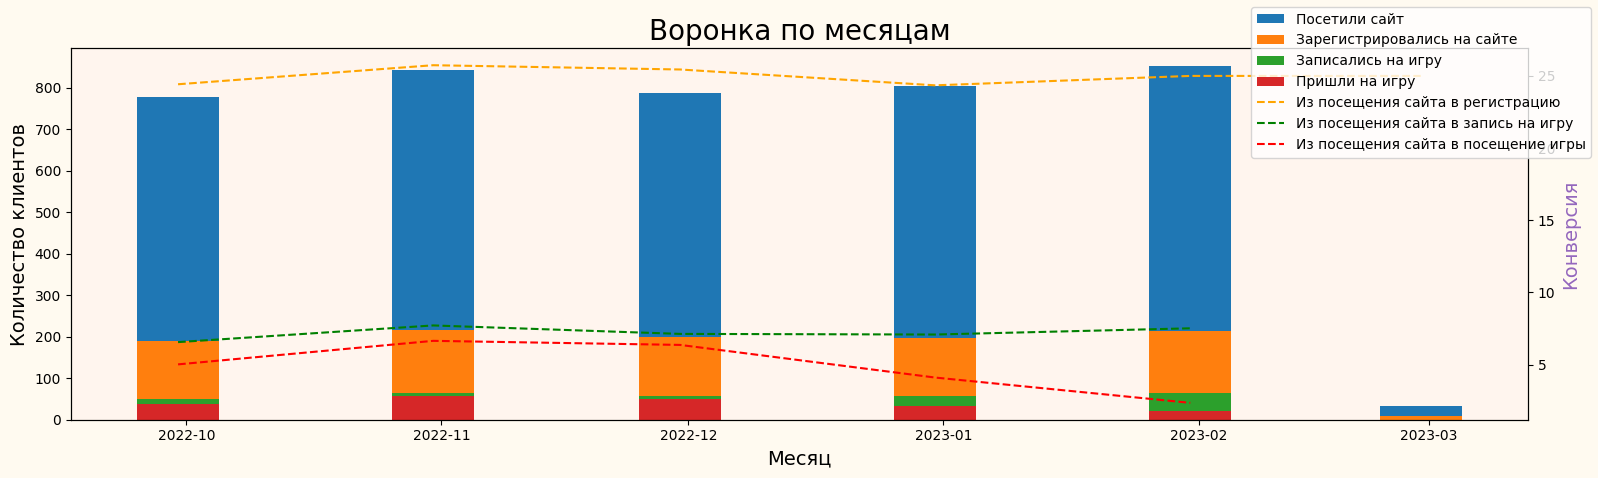

In [ ]:
fig, ax = plt.subplots()

wd=10
ax.bar(df_m['Дата'], df_m['Посетили'], width=wd,label='Посетили сайт')
ax.bar(df_m['Дата'], df_m['Зарегистриовались'],width=wd, label='Зарегистрировались на сайте')
ax.bar(df_m['Дата'], df_m['Записались'],width=wd, label='Записались на игру')
ax.bar(df_m['Дата'], df_m['Пришли'],width=wd, label = "Пришли на игру")

ax.set_ylabel('Количество клиентов', fontsize=14)
ax.set_xlabel('Месяц', fontsize=14)
ax.set_facecolor('seashell')

ax2 = ax.twinx()
ax2.set_ylabel('Конверсия', color='tab:purple', fontsize=14)

ax2.plot(df_m['Дата'], df_m['Зарегистриовались'] * 100 / df_m['Посетили'],color="orange", label = "Из посещения сайта в регистрацию", linestyle='dashed')
ax2.plot(df_m['Дата'], df_m['Записались'] * 100 / df_m['Посетили'], color="green", label = "Из посещения сайта в запись на игру", linestyle='dashed')
ax2.plot(df_m['Дата'],  df_m['Пришли'] * 100 / df_m['Посетили'],color="red", label = "Из посещения сайта в посещение игры", linestyle='dashed')

fig.set_figwidth(16)
#fig.set_figheight(8)
fig.set_facecolor('floralwhite')
plt.title('Воронка по месяцам', fontsize=20)

fig.tight_layout()
fig.legend()
plt.show()